In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import re
import requests
import scipy as sp
import dabest
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, roc_curve, auc, confusion_matrix, matthews_corrcoef

In [14]:
mis_all = pd.read_csv('VEPwithGB_icd10_0323.csv')
mis_all

/Users/joannahench/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Location,Allele,Protein_position,SYMBOL,Amino_acids,locus,SIFT,PolyPhen,BayesDel_addAF_score,BayesDel_noAF_score,...,coding_description,category,AC,AF,BETA,SE,AF.Cases,AF.Controls,Pvalue,vcf
0,11:113412715-113412715,C,327,DRD2,K/E,chr11:113412715,tolerated(0.27),benign(0.031),-0.260005,-0.140988,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,1907,0.002415,0.431260,0.53696,0.003472,0.002413,0.421890,11 113412715 . T C
1,11:113412715-113412715,C,327,DRD2,K/E,chr11:113412715,tolerated(0.27),benign(0.031),-0.260005,-0.140988,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,1907,0.002415,-0.246980,0.61625,0.001845,0.002416,0.688580,11 113412715 . T C
2,11:113412715-113412715,C,327,DRD2,K/E,chr11:113412715,tolerated(0.27),benign(0.031),-0.260005,-0.140988,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,1907,0.002415,1.305800,1.07300,0.005556,0.002413,0.223580,11 113412715 . T C
3,11:113412715-113412715,C,327,DRD2,K/E,chr11:113412715,tolerated(0.27),benign(0.031),-0.260005,-0.140988,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,1907,0.002415,-0.141640,0.27161,0.002068,0.002417,0.602020,11 113412715 . T C
4,11:113412715-113412715,C,327,DRD2,K/E,chr11:113412715,tolerated(0.27),benign(0.031),-0.260005,-0.140988,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,1907,0.002415,0.071904,0.52037,0.002584,0.002415,0.890100,11 113412715 . T C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654733,X:114907411-114907411,C,458,HTR2C,V/A,chrX:114907411,deleterious(0),benign(0.309),-0.00911951,-0.250876,...,NaN,Chapter XXI Factors influencing health status ...,3,0.000004,-1.007700,7.82990,0.000000,0.000004,0.897600,X 114907411 . T C
654734,X:114907411-114907411,C,458,HTR2C,V/A,chrX:114907411,deleterious(0),benign(0.309),-0.00911951,-0.250876,...,NaN,Chapter XXI Factors influencing health status ...,3,0.000004,5.129800,2.33040,0.000049,0.000003,0.027721,X 114907411 . T C
654735,X:114907411-114907411,C,458,HTR2C,V/A,chrX:114907411,deleterious(0),benign(0.309),-0.00911951,-0.250876,...,NaN,Chapter XXI Factors influencing health status ...,3,0.000004,-1.015900,4.91580,0.000000,0.000004,0.836280,X 114907411 . T C
654736,X:114907411-114907411,C,458,HTR2C,V/A,chrX:114907411,deleterious(0),benign(0.309),-0.00911951,-0.250876,...,NaN,Chapter XXI Factors influencing health status ...,3,0.000004,-1.022800,3.18950,0.000000,0.000004,0.748460,X 114907411 . T C


In [15]:
gpcr_dm = pd.read_csv('GPCR_disease_mutations.csv')
gpcr_dm


,Unnamed: 0,index,snpId,diseaseName,diseaseType,score,pmid,Consequence,ENSG,ENST,EntryName,Family,WTaa,Amino_acids,GPCRdb,Segment,Class,Ligandtype,gene,Location
0,0,0,rs10246939,sensory perception of bitter taste,phenotype,0.70,23966204.0,missense_variant,ENSG00000257138,ENST00000547270,t2r38_human,Taste 2 receptors,I,I/V,7.52x52,TM7,Class T (Taste 2),Sensory receptors,TAS2R38,7:141972804-141972804
1,1,1,rs10246939,Obesity,disease,0.01,31438650.0,missense_variant,ENSG00000257138,ENST00000547270,t2r38_human,Taste 2 receptors,I,I/V,7.52x52,TM7,Class T (Taste 2),Sensory receptors,TAS2R38,7:141972804-141972804
2,2,2,rs10246939,Craniosynostosis,disease,0.01,24415641.0,missense_variant,ENSG00000257138,ENST00000547270,t2r38_human,Taste 2 receptors,I,I/V,7.52x52,TM7,Class T (Taste 2),Sensory receptors,TAS2R38,7:141972804-141972804
3,3,3,rs10246939,Adenomatous polyp of colon,disease,0.01,21769326.0,missense_variant,ENSG00000257138,ENST00000547270,t2r38_human,Taste 2 receptors,I,I/V,7.52x52,TM7,Class T (Taste 2),Sensory receptors,TAS2R38,7:141972804-141972804
4,4,4,rs10246939,Taste Perception (mental process),phenotype,0.70,22132133.0,missense_variant,ENSG00000257138,ENST00000547270,t2r38_human,Taste 2 receptors,I,I/V,7.52x52,TM7,Class T (Taste 2),Sensory receptors,TAS2R38,7:141972804-141972804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10696,10696,23475,rs782806507,Nephrogenic Diabetes Insipidus,disease,0.01,10648821.0,missense_variant,ENSG00000126895,ENST00000646375,v2r_human,Vasopressin and oxytocin receptors,R,R/C,5.35x36,TM5,Class A (Rhodopsin),Peptide receptors,AVPR2,X:153906110-153906110
10697,10697,23476,rs782806507,"Nephrogenic Diabetes Insipidus, Type I",disease,0.70,8078903.0,missense_variant,ENSG00000126895,ENST00000646375,v2r_human,Vasopressin and oxytocin receptors,R,R/C,5.35x36,TM5,Class A (Rhodopsin),Peptide receptors,AVPR2,X:153906110-153906110
10698,10698,23477,rs782806507,"Nephrogenic Diabetes Insipidus, Type I",disease,0.70,8267567.0,missense_variant,ENSG00000126895,ENST00000646375,v2r_human,Vasopressin and oxytocin receptors,R,R/C,5.35x36,TM5,Class A (Rhodopsin),Peptide receptors,AVPR2,X:153906110-153906110
10699,10699,23541,rs149668713,Malignant neoplasm of breast,disease,0.70,NaN,missense_variant,ENSG00000126895,ENST00000646375,v2r_human,Vasopressin and oxytocin receptors,R,R/H,NaN,ICL3,Class A (Rhodopsin),Peptide receptors,AVPR2,X:153906246-153906246


In [114]:
# how many unique disease mutations
gpcr_dm.drop_duplicates(subset=['EntryName','Amino_acids'],keep='first')

,Unnamed: 0,index,snpId,diseaseName,diseaseType,score,pmid,Consequence,ENSG,ENST,EntryName,Family,WTaa,Amino_acids,GPCRdb,Segment,Class,Ligandtype,SYMBOL,Location
0,0,0,rs10246939,sensory perception of bitter taste,phenotype,0.70,23966204.0,missense_variant,ENSG00000257138,ENST00000547270,t2r38_human,Taste 2 receptors,I,I/V,7.52x52,TM7,Class T (Taste 2),Sensory receptors,TAS2R38,7:141972804-141972804
6,6,6,rs104893768,Retinitis Pigmentosa 4,disease,0.80,7633434.0,missense_variant,ENSG00000163914,ENST00000296271,opsd_human,Opsins,P,P/H,NaN,N-term,Class A (Rhodopsin),Sensory receptors,RHO,3:129528801-129528801
86,86,86,rs104893797,Nyctalopia,disease,0.01,10980774.0,missense_variant,ENSG00000163914,ENST00000296271,opsd_human,Opsins,P,P/A,NaN,N-term,Class A (Rhodopsin),Sensory receptors,RHO,3:129528800-129528800
89,89,89,rs104893769,Retinitis Pigmentosa 4,disease,0.80,8353500.0,missense_variant,ENSG00000163914,ENST00000296271,opsd_human,Opsins,T,T/M,NaN,N-term,Class A (Rhodopsin),Sensory receptors,RHO,3:129528783-129528783
121,121,121,rs104893770,Retinitis Pigmentosa 4,disease,0.80,1391967.0,missense_variant,ENSG00000163914,ENST00000296271,opsd_human,Opsins,F,F/L,1.40x40,TM1,Class A (Rhodopsin),Sensory receptors,RHO,3:129528866-129528866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10664,10664,23434,rs775145092,Somatotropin deficiency,disease,0.01,26797872.0,missense_variant,ENSG00000165370,ENST00000651716,gp101_human,Class A orphans,V,V/L,5.44x44,TM5,Class A (Rhodopsin),Orphan receptors,GPR101,X:137031083-137031083
10666,10666,23436,rs561077,Mental Depression,disease,0.01,25798330.0,missense_variant,ENSG00000102195,ENST00000218316,mtr1l_human,Class A orphans,T,T/A,NaN,C-term,Class A (Rhodopsin),Orphan receptors,GPR50,X:151181177-151181177
10670,10670,23440,rs13440581,Mental Depression,disease,0.01,25798330.0,missense_variant,ENSG00000102195,ENST00000218316,mtr1l_human,Class A orphans,I,I/V,NaN,C-term,Class A (Rhodopsin),Orphan receptors,GPR50,X:151181399-151181399
10676,10676,23449,rs1057518723,"Nephrogenic Diabetes Insipidus, Type I",disease,0.70,NaN,missense_variant,ENSG00000126895,ENST00000646375,v2r_human,Vasopressin and oxytocin receptors,C,C/F,3.25x25,TM3,Class A (Rhodopsin),Peptide receptors,AVPR2,X:153905841-153905841


In [16]:
gpcr_dm.rename(columns={'gene':'SYMBOL'},inplace=True)
gpcr_dm

,Unnamed: 0,index,snpId,diseaseName,diseaseType,score,pmid,Consequence,ENSG,ENST,EntryName,Family,WTaa,Amino_acids,GPCRdb,Segment,Class,Ligandtype,SYMBOL,Location
0,0,0,rs10246939,sensory perception of bitter taste,phenotype,0.70,23966204.0,missense_variant,ENSG00000257138,ENST00000547270,t2r38_human,Taste 2 receptors,I,I/V,7.52x52,TM7,Class T (Taste 2),Sensory receptors,TAS2R38,7:141972804-141972804
1,1,1,rs10246939,Obesity,disease,0.01,31438650.0,missense_variant,ENSG00000257138,ENST00000547270,t2r38_human,Taste 2 receptors,I,I/V,7.52x52,TM7,Class T (Taste 2),Sensory receptors,TAS2R38,7:141972804-141972804
2,2,2,rs10246939,Craniosynostosis,disease,0.01,24415641.0,missense_variant,ENSG00000257138,ENST00000547270,t2r38_human,Taste 2 receptors,I,I/V,7.52x52,TM7,Class T (Taste 2),Sensory receptors,TAS2R38,7:141972804-141972804
3,3,3,rs10246939,Adenomatous polyp of colon,disease,0.01,21769326.0,missense_variant,ENSG00000257138,ENST00000547270,t2r38_human,Taste 2 receptors,I,I/V,7.52x52,TM7,Class T (Taste 2),Sensory receptors,TAS2R38,7:141972804-141972804
4,4,4,rs10246939,Taste Perception (mental process),phenotype,0.70,22132133.0,missense_variant,ENSG00000257138,ENST00000547270,t2r38_human,Taste 2 receptors,I,I/V,7.52x52,TM7,Class T (Taste 2),Sensory receptors,TAS2R38,7:141972804-141972804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10696,10696,23475,rs782806507,Nephrogenic Diabetes Insipidus,disease,0.01,10648821.0,missense_variant,ENSG00000126895,ENST00000646375,v2r_human,Vasopressin and oxytocin receptors,R,R/C,5.35x36,TM5,Class A (Rhodopsin),Peptide receptors,AVPR2,X:153906110-153906110
10697,10697,23476,rs782806507,"Nephrogenic Diabetes Insipidus, Type I",disease,0.70,8078903.0,missense_variant,ENSG00000126895,ENST00000646375,v2r_human,Vasopressin and oxytocin receptors,R,R/C,5.35x36,TM5,Class A (Rhodopsin),Peptide receptors,AVPR2,X:153906110-153906110
10698,10698,23477,rs782806507,"Nephrogenic Diabetes Insipidus, Type I",disease,0.70,8267567.0,missense_variant,ENSG00000126895,ENST00000646375,v2r_human,Vasopressin and oxytocin receptors,R,R/C,5.35x36,TM5,Class A (Rhodopsin),Peptide receptors,AVPR2,X:153906110-153906110
10699,10699,23541,rs149668713,Malignant neoplasm of breast,disease,0.70,NaN,missense_variant,ENSG00000126895,ENST00000646375,v2r_human,Vasopressin and oxytocin receptors,R,R/H,NaN,ICL3,Class A (Rhodopsin),Peptide receptors,AVPR2,X:153906246-153906246


In [195]:
op = pd.merge(gpcr_dm,mis_all,on=['SYMBOL','Location','Amino_acids'])
op.columns

Index(['Unnamed: 0_x', 'index', 'snpId', 'diseaseName', 'diseaseType', 'score',
       'pmid', 'Consequence', 'ENSG', 'ENST', 'EntryName', 'Family', 'WTaa',
       'Amino_acids', 'GPCRdb', 'Segment', 'Class', 'Ligandtype', 'SYMBOL',
       'Location', 'Allele', 'Protein_position', 'locus', 'SIFT', 'PolyPhen',
       'BayesDel_addAF_score', 'BayesDel_noAF_score', 'CADD_phred',
       'ClinPred_score', 'DANN_score', 'DEOGEN2_score', 'FATHMM_score',
       'integrated_fitCons_score', 'LIST-S2_score', 'LRT_score', 'M-CAP_score',
       'MVP_score', 'MetaLR_score', 'MetaRNN_score', 'MetaSVM_score',
       'MutationAssessor_score', 'PROVEAN_score', 'PrimateAI_score',
       'REVEL_score', 'VEST4_score', 'GERP++_RS', 'SiPhy_29way_logOdds',
       'MutPred_score', 'Unnamed: 0_y', 'alleles', 'markerID', 'gene',
       'annotation', 'call_stats', 'n_cases', 'n_controls', 'heritability',
       'saige_version', 'inv_normalized', 'trait_type', 'phenocode',
       'pheno_sex', 'coding', 'modifier',

In [42]:
op.to_csv('gpcr_disease_genebass_description.csv',index=False)

In [25]:
len(np.unique(op['vcf']))

119

In [196]:
overlap_var = op[['SYMBOL','Protein_position','Amino_acids']]

overlap_var = overlap_var.drop_duplicates(keep='first')

overlap_var.reset_index()

,index,SYMBOL,Protein_position,Amino_acids
0,0,MC4R,102,I/T
1,90,MC4R,170,I/V
2,135,MC4R,274,N/S
3,180,MC4R,271,C/Y
4,225,MC4R,175,A/T
...,...,...,...,...
114,84006,ADRA1A,160,G/A
115,84049,ADRA1A,160,G/E
116,84094,ADRA1A,131,P/Q
117,84131,ADRB3,25,A/T


In [43]:
# get the beta&p from genebass for all overlapped missense variant
genebass_dm = pd.merge(mis_all,overlap_var)


,Location,Allele,Protein_position,SYMBOL,Amino_acids,locus,SIFT,PolyPhen,BayesDel_addAF_score,BayesDel_noAF_score,...,coding_description,category,AC,AF,BETA,SE,AF.Cases,AF.Controls,Pvalue,vcf
0,18:60371529-60371529,C,274,MC4R,N/S,chr18:60371529,tolerated(0.09),possibly_damaging(0.864),-0.058474,-0.306284,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,3,0.000004,-1.006500,11.109000,0.00000,0.000004,0.92781,18 60371529 . T C
1,18:60371529-60371529,C,274,MC4R,N/S,chr18:60371529,tolerated(0.09),possibly_damaging(0.864),-0.058474,-0.306284,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,3,0.000004,-1.005300,12.240000,0.00000,0.000004,0.93454,18 60371529 . T C
2,18:60371529-60371529,C,274,MC4R,N/S,chr18:60371529,tolerated(0.09),possibly_damaging(0.864),-0.058474,-0.306284,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,3,0.000004,-0.998350,24.275000,0.00000,0.000004,0.96720,18 60371529 . T C
3,18:60371529-60371529,C,274,MC4R,N/S,chr18:60371529,tolerated(0.09),possibly_damaging(0.864),-0.058474,-0.306284,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,3,0.000004,-1.017000,6.319200,0.00000,0.000004,0.87214,18 60371529 . T C
4,18:60371529-60371529,C,274,MC4R,N/S,chr18:60371529,tolerated(0.09),possibly_damaging(0.864),-0.058474,-0.306284,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,3,0.000004,-1.005600,11.313000,0.00000,0.000004,0.92917,18 60371529 . T C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,X:114731326-114731326,G,23,HTR2C,S/C,chrX:114731326,tolerated_low_confidence(0.18),benign(0),-,-,...,NaN,Chapter XXI Factors influencing health status ...,664757,0.841800,0.010175,0.022530,0.84649,0.841740,0.65155,X 114731326 . C G
5203,X:114731326-114731326,G,23,HTR2C,S/C,chrX:114731326,tolerated_low_confidence(0.18),benign(0),-,-,...,NaN,Chapter XXI Factors influencing health status ...,664757,0.841800,-0.009123,0.016250,0.84153,0.841810,0.57451,X 114731326 . C G
5204,X:114731326-114731326,G,23,HTR2C,S/C,chrX:114731326,tolerated_low_confidence(0.18),benign(0),-,-,...,NaN,Chapter XXI Factors influencing health status ...,664757,0.841800,0.008226,0.021760,0.84350,0.841780,0.70542,X 114731326 . C G
5205,X:114731326-114731326,G,23,HTR2C,S/C,chrX:114731326,tolerated_low_confidence(0.18),benign(0),-,-,...,NaN,Chapter XXI Factors influencing health status ...,664757,0.841800,0.010652,0.016951,0.84259,0.841780,0.52977,X 114731326 . C G


In [103]:
genebass_dm

,Location,Allele,Protein_position,SYMBOL,Amino_acids,locus,SIFT,PolyPhen,BayesDel_addAF_score,BayesDel_noAF_score,...,coding_description,category,AC,AF,BETA,SE,AF.Cases,AF.Controls,Pvalue,vcf
0,18:60371529-60371529,C,274,MC4R,N/S,chr18:60371529,tolerated(0.09),possibly_damaging(0.864),-0.058474,-0.306284,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,3,0.000004,-1.006500,11.109000,0.00000,0.000004,0.92781,18 60371529 . T C
1,18:60371529-60371529,C,274,MC4R,N/S,chr18:60371529,tolerated(0.09),possibly_damaging(0.864),-0.058474,-0.306284,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,3,0.000004,-1.005300,12.240000,0.00000,0.000004,0.93454,18 60371529 . T C
2,18:60371529-60371529,C,274,MC4R,N/S,chr18:60371529,tolerated(0.09),possibly_damaging(0.864),-0.058474,-0.306284,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,3,0.000004,-0.998350,24.275000,0.00000,0.000004,0.96720,18 60371529 . T C
3,18:60371529-60371529,C,274,MC4R,N/S,chr18:60371529,tolerated(0.09),possibly_damaging(0.864),-0.058474,-0.306284,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,3,0.000004,-1.017000,6.319200,0.00000,0.000004,0.87214,18 60371529 . T C
4,18:60371529-60371529,C,274,MC4R,N/S,chr18:60371529,tolerated(0.09),possibly_damaging(0.864),-0.058474,-0.306284,...,NaN,Chapter II Neoplasms | C15-C26 Malignant neopl...,3,0.000004,-1.005600,11.313000,0.00000,0.000004,0.92917,18 60371529 . T C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,X:114731326-114731326,G,23,HTR2C,S/C,chrX:114731326,tolerated_low_confidence(0.18),benign(0),-,-,...,NaN,Chapter XXI Factors influencing health status ...,664757,0.841800,0.010175,0.022530,0.84649,0.841740,0.65155,X 114731326 . C G
5203,X:114731326-114731326,G,23,HTR2C,S/C,chrX:114731326,tolerated_low_confidence(0.18),benign(0),-,-,...,NaN,Chapter XXI Factors influencing health status ...,664757,0.841800,-0.009123,0.016250,0.84153,0.841810,0.57451,X 114731326 . C G
5204,X:114731326-114731326,G,23,HTR2C,S/C,chrX:114731326,tolerated_low_confidence(0.18),benign(0),-,-,...,NaN,Chapter XXI Factors influencing health status ...,664757,0.841800,0.008226,0.021760,0.84350,0.841780,0.70542,X 114731326 . C G
5205,X:114731326-114731326,G,23,HTR2C,S/C,chrX:114731326,tolerated_low_confidence(0.18),benign(0),-,-,...,NaN,Chapter XXI Factors influencing health status ...,664757,0.841800,0.010652,0.016951,0.84259,0.841780,0.52977,X 114731326 . C G


<Axes: xlabel='Pvalue', ylabel='Density'>

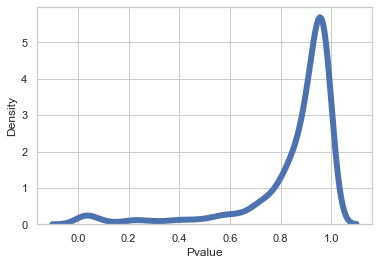

In [153]:
sns.set(style="whitegrid")
# distribution of beta and p
# genebass_dm.groupby(by=["SYMBOL","Protein_position","Amino_acids"])[['BETA']]
mc4r = mis_all[mis_all['SYMBOL']=='MC4R']

sns.kdeplot(data=mc4r,x='Pvalue',linewidth=6)


DM v.s. NDM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.296e-05 U_stat=1.121e+06


/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_33483/958796399.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  genebass_ndm_ag = pd.DataFrame(genebass_ndm.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).max()['BETA'])


(<Axes: xlabel='label', ylabel='BETA'>,
 [<statannot.StatResult.StatResult at 0x7f9fd7eeb3d0>])

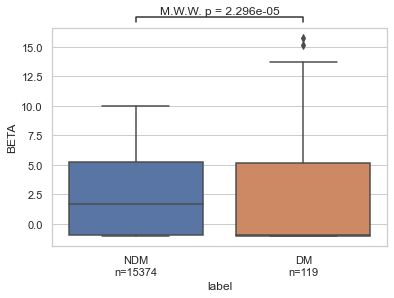

In [407]:
genebass_dm_ag['Pvalue'].tolist()


[0.028584,
 0.012389,
 0.038839,
 0.013731,
 0.72027,
 0.75996,
 0.048185,
 0.014782,
 0.000165,
 0.0058416,
 0.109,
 0.0061453,
 0.79197,
 0.057818,
 0.020617,
 0.020862,
 0.046221,
 0.074641,
 0.011939,
 0.0043926,
 0.041357,
 0.11317,
 0.00035,
 0.72944,
 0.83637,
 0.71376,
 0.67746,
 0.0015833,
 0.90077,
 0.1627,
 0.80253,
 0.047347,
 0.67555,
 0.00294,
 0.0019054,
 0.80869,
 0.70494,
 0.0086444,
 0.016195,
 0.59469,
 0.81853,
 0.62126,
 0.053816,
 0.0048973,
 0.0433,
 0.024611,
 0.012175,
 0.025997,
 0.0083768,
 0.020835,
 0.030059,
 0.0028014,
 0.00010705,
 0.025428,
 0.00096427,
 0.016774,
 0.87589,
 0.0030532,
 0.045833,
 0.063426,
 0.66616,
 0.80073,
 0.0055202,
 0.014311,
 0.079572,
 0.73188,
 0.0062577,
 0.78433,
 0.01587,
 0.83073,
 0.040484,
 0.026322,
 0.014929,
 0.0031647,
 0.0050694,
 0.046897,
 0.90695,
 0.003744,
 0.033884,
 0.067754,
 0.0089465,
 0.001488,
 0.0051541,
 0.015207,
 0.0026884,
 0.021415,
 0.0073939,
 0.030335,
 0.0038661,
 0.81399,
 0.0021681,
 0.031133

In [409]:
import scipy.stats as stats

# Example data for two groups: DM and NDM
dm_data = genebass_dm_ag['Pvalue'].tolist()
ndm_data = genebass_ndm_ag['Pvalue'].tolist()

# Perform Bartlett's test
bartlett_result = stats.bartlett(dm_data, ndm_data)
print("Bartlett's test p-value:", bartlett_result.pvalue)

# Perform Levene's test
levene_result = stats.levene(dm_data, ndm_data)
print("Levene's test p-value:", levene_result.pvalue)

# Perform Fligner-Killeen test
fligner_result = stats.fligner(dm_data, ndm_data)
print("Fligner-Killeen test p-value:", fligner_result.pvalue)



Bartlett's test p-value: 0.054756870549854224
Levene's test p-value: 1.741634884535942e-11
Fligner-Killeen test p-value: 0.5689317344099996


/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_33483/2017989340.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  genebass_ndm_ag = pd.DataFrame(genebass_ndm.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).min()['Pvalue'])


DM v.s. NDM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.058e-09 U_stat=6.266e+05


(<Axes: xlabel='label', ylabel='Pvalue'>,
 [<statannot.StatResult.StatResult at 0x7f9f00ff6e80>])

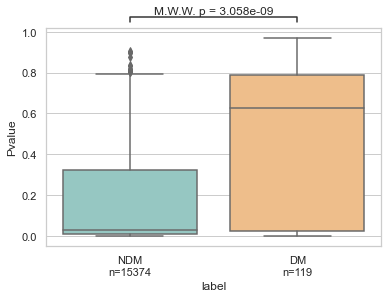

In [429]:
genebass_dm_ag = pd.DataFrame(genebass_dm.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).min()['Pvalue'])
genebass_dm_ag['label'] = 'DM'
genebass_ndm = mis_all.drop(genebass_dm.index, axis=0)
genebass_ndm_ag = pd.DataFrame(genebass_ndm.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).min()['Pvalue'])
genebass_ndm_ag['label'] = 'NDM'
# concat
dm_ndm = pd.concat([genebass_dm_ag,genebass_ndm_ag],axis=0)

my_pal = {"DM": '#8ECFC9', "NDM": '#FFBE7A'}
pairs = [('NDM', 'DM')]   # 'NDM' vs 'DM'
# fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(data=dm_ndm, x="label", y="Pvalue",palette=my_pal)
l_list = dm_ndm['label'].value_counts().index.tolist()

# get the sample size for each function annotation
nobs = dm_ndm['label'].value_counts().values.tolist()

# set the tick labels as the combination of class name and sample size
xticklabels = [f"{class_name}\nn={nobs[i]}" for i, class_name in enumerate(l_list)]
plt.xticks(range(len(l_list)), xticklabels)
add_stat_annotation(ax, data=dm_ndm, x="label", y="Pvalue",
                    box_pairs= pairs,
                    test='Mann-Whitney', text_format='full', loc='outside', verbose=2)


In [426]:
genebass_dm_ag

Pvalue label
SYMBOL Protein_position Amino_acids                
ADRA1A 131              P/Q          0.028584    DM
       160              G/A          0.012389    DM
                        G/E          0.038839    DM
       216              R/Q          0.013731    DM
       232              V/L          0.720270    DM
...                                       ...   ...
MC4R   295              S/P          0.059217    DM
       299              P/H          0.340920    DM
       302              Y/F          0.079721    DM
       308              E/K          0.017711    DM
       317              I/T          0.895410    DM

[119 rows x 2 columns]

/Users/joannahench/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<Axes: ylabel='Density'>

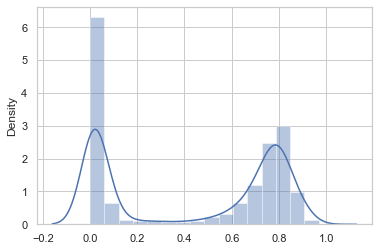

In [428]:
sns.distplot(genebass_ndm_ag,x=genebass_ndm_ag["Pvalue"].tolist())

In [412]:
analysis_of_long_df = dabest.load(dm_ndm, idx=("NDM", "DM"),
                                   x="label", y="Pvalue")

analysis_of_long_df

DABEST v2023.02.14
                  
Good morning!
The current time is Wed May 17 10:42:28 2023.

Effect size(s) with 95% confidence intervals will be computed for:
1. DM minus NDM

5000 resamples will be used to generate the effect size bootstraps.

In [413]:
analysis_of_long_df.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,NDM,DM,15374,119,mean difference,None,0.669151,95,0.118916,1.28365,0.0436,0.027507,-2.231409,0.044488,-2.009623,0.000023,708971.0


In [98]:


# To illustrate examples
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from statannot import add_stat_annotation
sns.set(style="whitegrid")

In [ ]:
genebass_dm

/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_33483/1074450195.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  genebass_ndm_ag = pd.DataFrame(genebass_ndm.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).max()['BETA'])


Bartlett's test p-value: 0.11640333756401523
Levene's test p-value: 0.7929740795834918
Fligner-Killeen test p-value: 0.4185144990851799
DM v.s. NDM: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.296e-05 U_stat=1.121e+06


(<Axes: xlabel='label', ylabel='BETA'>,
 [<statannot.StatResult.StatResult at 0x7f9eaa9e3a30>])

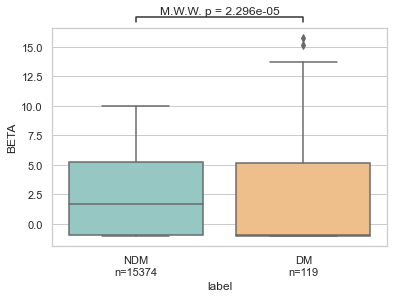

In [411]:
genebass_dm_ag = pd.DataFrame(genebass_dm.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).max()['BETA'])
genebass_dm_ag['label'] = 'DM'
genebass_ndm = mis_all.drop(genebass_dm.index, axis=0)
genebass_ndm_ag = pd.DataFrame(genebass_ndm.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).max()['BETA'])
genebass_ndm_ag['label'] = 'NDM'
# concat
dm_ndm = pd.concat([genebass_dm_ag,genebass_ndm_ag],axis=0)



# Example data for two groups: DM and NDM
dm_data = genebass_dm_ag['BETA'].tolist()
ndm_data = genebass_ndm_ag['BETA'].tolist()

# Perform Bartlett's test
bartlett_result = stats.bartlett(dm_data, ndm_data)
print("Bartlett's test p-value:", bartlett_result.pvalue)

# Perform Levene's test
levene_result = stats.levene(dm_data, ndm_data)
print("Levene's test p-value:", levene_result.pvalue)

# Perform Fligner-Killeen test
fligner_result = stats.fligner(dm_data, ndm_data)
print("Fligner-Killeen test p-value:", fligner_result.pvalue)



my_pal = {"DM": '#8ECFC9', "NDM": '#FFBE7A'}
pairs = [('NDM', 'DM')]   # 'NDM' vs 'DM'
# fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(data=dm_ndm, x="label", y="BETA",palette=my_pal)
t1 = pd.DataFrame(dm_ndm['label'].value_counts())

# get the maximum y-value for each function annotation
max_value = dm_ndm.groupby(['label'])['BETA'].max().values

# get the sample size for each function annotation
nobs = dm_ndm['label'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]

# set the tick labels as the combination of class name and sample size
xticklabels = [f"{class_name}\nn={nobs[i]}" for i, class_name in enumerate(t1.index.tolist())]
plt.xticks(range(len(max_value)), xticklabels)
add_stat_annotation(ax, data=dm_ndm, x="label", y="BETA",
                    box_pairs= pairs,
                    test='Mann-Whitney', text_format='full', loc='outside', verbose=2)

In [77]:
pvalues = analysis_of_long_df.mean_diff.statistical_tests['pvalue_welch']
# Transform each p-value to "p=" in scientific notation
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]
formatted_pvalues

['p=2.75e-02']

In [281]:
# read in the treshold file
sthresh = pd.read_csv('score_threshold.csv')
sthresh

# import the names of VEPs
VEP_list = ["SIFT",
"PolyPhen",
"BayesDel_addAF_score",
"BayesDel_noAF_score",
"CADD_phred",
"ClinPred_score",
"DANN_score",
"DEOGEN2_score",
"FATHMM_score",
"integrated_fitCons_score",
"LIST-S2_score",
"LRT_score",
"M-CAP_score",
"MVP_score",
"MetaLR_score",
"MetaRNN_score",
"MetaSVM_score",
"MutationAssessor_score",
"PROVEAN_score",
"PrimateAI_score",
"REVEL_score",
"VEST4_score",
"GERP++_RS",
"SiPhy_29way_logOdds",
"MutPred_score"]


def get_performance(VEPwithGB,aggregation,beta,pval,general=True):
    # whether to do aggregation
    # aggregation = 'mean'
    # print('start: ',aggregation)
    perf_df = pd.DataFrame()

    row = 0
    for i in range(len(VEP_list)):  
        vep = sthresh['VEP'][i]
        # print('processing VEP: ',vep)
        thresh_value = sthresh['threshold'][i]
        thresh_greather = sthresh['greater than'][i]

        temp1 = VEPwithGB[VEPwithGB[vep]!='-'][['SYMBOL', 'Protein_position','Amino_acids',vep,'BETA','Pvalue']].reset_index(drop=True)
        p1 = re.compile(r'[(](.*?)[)]', re.S)
        if vep == 'SIFT' or vep == 'PolyPhen':
            temp1[vep] = temp1[vep].apply(lambda x: float(re.findall(p1,x)[0])) 
        elif vep == 'DEOGEN2_score' or vep == 'FATHMM_score' or vep == 'LIST-S2_score' or vep == 'MetaRNN_score' or vep == 'MVP_score' or vep == 'MutationAssessor_score' or vep == 'PROVEAN_score' or vep == 'REVEL_score' or vep == 'VEST4_score':
            temp2 = temp1[vep].apply(lambda x: list(set(str(x).split(',')) - set(['.'])))
            temp2 = temp2.apply(lambda x: float(x[0]) if len(x) > 0 else None)
            temp1[vep] = temp2
            temp1 = temp1.dropna(subset=[vep]).reset_index(drop=True)
            
        if temp1.shape[0]==0:
            continue
        else:
            temp1[vep] = temp1[vep].astype(float)
          
        if thresh_greather==1:
            temp1['vep_group'] = temp1[vep].apply(lambda x: 1 if x > thresh_value else 0)
        else:
            temp1['vep_group'] = temp1[vep].apply(lambda x: 1 if x < thresh_value else 0)
        

        # temp1['BETA_group'] = temp1['BETA'].apply(lambda x: 1 if x < -2 else (1 if x > 2 else 0))
        temp1['GB_group'] = temp1.apply(lambda row: 0 if (row['BETA'] < beta and row['Pvalue'] > pval) else 1, axis=1)


        if aggregation == 'mean':
            ag_df = temp1.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).mean()[['vep_group','GB_group']]
            ag_df['ag_GB_group'] = (ag_df['GB_group'] >= 0.3).astype(int)
            exp_labels = ag_df['ag_GB_group']
            pred_labels = ag_df['vep_group'].astype(int)
        
        elif aggregation == 'max':
            ag_df = temp1.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).max()[['vep_group','GB_group']]
            exp_labels = ag_df['GB_group']
            pred_labels = ag_df['vep_group']   

        else:
            exp_labels = temp1['GB_group']
            pred_labels = temp1['vep_group']
            
        
        # Calculate accuracy
        accuracy = accuracy_score(exp_labels, pred_labels)
        # Calculate precision, recall and F1-score
        precision = precision_score(exp_labels, pred_labels)
        recall = recall_score(exp_labels, pred_labels)
        f1 = f1_score(exp_labels, pred_labels)

        # calculate Matthews Correlation Coefficient
        mcc = matthews_corrcoef(exp_labels, pred_labels)


        # store in df
        perf_df.loc[row,'vep'] = vep
        perf_df.loc[row,'accuracy'] = accuracy
        perf_df.loc[row,'precision'] = precision
        perf_df.loc[row,'f1-score'] = f1
        perf_df.loc[row,'mcc'] = mcc


        
        if general:
            # calculate FPR and TPR
            fpr, tpr, thresholds = roc_curve(exp_labels, pred_labels)
            # calculate AUCROC
            auc_roc = auc(fpr, tpr)
            # Calculate confusion matrix
            tn, fp, fn, tp = confusion_matrix(exp_labels, pred_labels).ravel()

            # Calculate specificity and sensitivity
            specificity = tn / (tn + fp)
            sensitivity = tp / (tp + fn)
            perf_df.loc[row,'specificity'] = specificity
            perf_df.loc[row,'sensitivity'] = sensitivity
            perf_df.loc[row,'AUC'] = auc_roc
            # perf_df.loc[row,'#tp/#fp'] = str(tp)+'/'+str(fp)
            # perf_df.loc[row,'#tn/#fn'] = str(tn)+'/'+str(fn)
            # perf_df.loc[row,'#exp_negative'] = str(exp_labels.value_counts()[[0,1]][0])
            # perf_df.loc[row,'#exp_positive'] = str(exp_labels.value_counts()[[0,1]][1])
            # perf_df.loc[row,'#pred_negative'] = str(pred_labels.value_counts()[[0,1]][0])
            # perf_df.loc[row,'#pred_positive'] = str(pred_labels.value_counts()[[0,1]][1])
        row = row +1
    return perf_df


def get_performance_other(vep_gb_df,vep,aggregation,beta,pval,general=True):
    
    if vep == 'VESPAl':
        # VESPAl into two classifications: >=0.5(positive) <0.5(negative)
        vep_gb_df['vep_group'] = vep_gb_df[vep].apply(lambda x: 1 if x > 0.5 else 0)
    elif vep == 'Dynamut2':
         # ddg into two classifications: <0: Destabilising, >0: stabilising
        vep_gb_df['vep_group'] = vep_gb_df[vep].apply(lambda x: 1 if x < 0 else 0) 
    elif  vep == 'FoldX':
         # ddg into two classifications: <0: Destabilising, >0: stabilising
        vep_gb_df['vep_group'] = vep_gb_df[vep].apply(lambda x: 1 if x < 1.5 else 0)   
    elif  vep == 'RaSP':
         # ddg into two classifications: <0: Destabilising, >0: stabilising
        vep_gb_df['vep_group'] = vep_gb_df[vep].apply(lambda x: 1 if x < 2.5 else 0)   
    # vep_gb_df['BETA_group'] = vep_gb_df['BETA'].apply(lambda x: 1 if x < -2 else (1 if x > 2 else 0))
    vep_gb_df['GB_group'] = vep_gb_df.apply(lambda row: 0 if (row['BETA'] < beta and row['Pvalue'] > pval) else 1, axis=1)

    # aggregation = 'mean'

    if aggregation == 'mean':
        ag_df = vep_gb_df.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).mean()[['vep_group','GB_group']]
        ag_df['ag_beta_group'] = (ag_df['GB_group'] >= 0.3).astype(int)
        exp_labels = ag_df['ag_beta_group']
        pred_labels = ag_df['vep_group'].astype(int)
    
    elif aggregation == 'max':
        ag_df = vep_gb_df.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).max()[['vep_group','GB_group']]
        exp_labels = ag_df['GB_group']
        pred_labels = ag_df['vep_group']   

    else:
        exp_labels = vep_gb_df['GB_group']
        pred_labels = vep_gb_df['vep_group']
    row = 0
    perf_df = pd.DataFrame()
    # Calculate accuracy
    accuracy = accuracy_score(exp_labels, pred_labels)
    # Calculate precision, recall and F1-score
    precision = precision_score(exp_labels, pred_labels)
    recall = recall_score(exp_labels, pred_labels)
    f1 = f1_score(exp_labels, pred_labels)
    # calculate Matthews Correlation Coefficient
    mcc = matthews_corrcoef(exp_labels, pred_labels)


    # store in df
    perf_df.loc[row,'vep'] = vep
    perf_df.loc[row,'accuracy'] = accuracy
    perf_df.loc[row,'precision'] = precision
    perf_df.loc[row,'f1-score'] = f1
    perf_df.loc[row,'mcc'] = mcc

    if general:
        # calculate FPR and TPR
        fpr, tpr, thresholds = roc_curve(exp_labels, pred_labels)

        # calculate AUCROC
        auc_roc = auc(fpr, tpr)
        perf_df.loc[row,'AUC'] = auc_roc
        # Calculate confusion matrix
        tn, fp, fn, tp = confusion_matrix(exp_labels, pred_labels).ravel()
        # Calculate specificity and sensitivity
        specificity = tn / (tn + fp)
        sensitivity = tp / (tp + fn)
        perf_df.loc[row,'specificity'] = specificity
        perf_df.loc[row,'sensitivity'] = sensitivity
        # perf_df.loc[row,'#tp/#fp'] = str(tp)+'/'+str(fp)
        # perf_df.loc[row,'#tn/#fn'] = str(tn)+'/'+str(fn)
        # perf_df.loc[row,'#exp_negative'] = str(exp_labels.value_counts()[[0,1]][0])
        # perf_df.loc[row,'#exp_positive'] = str(exp_labels.value_counts()[[0,1]][1])
        # perf_df.loc[row,'#pred_negative'] = str(pred_labels.value_counts()[[0,1]][0])
        # perf_df.loc[row,'#pred_positive'] = str(pred_labels.value_counts()[[0,1]][1])
    return perf_df


In [163]:
len(np.unique(genebass_dm['SYMBOL']))

23

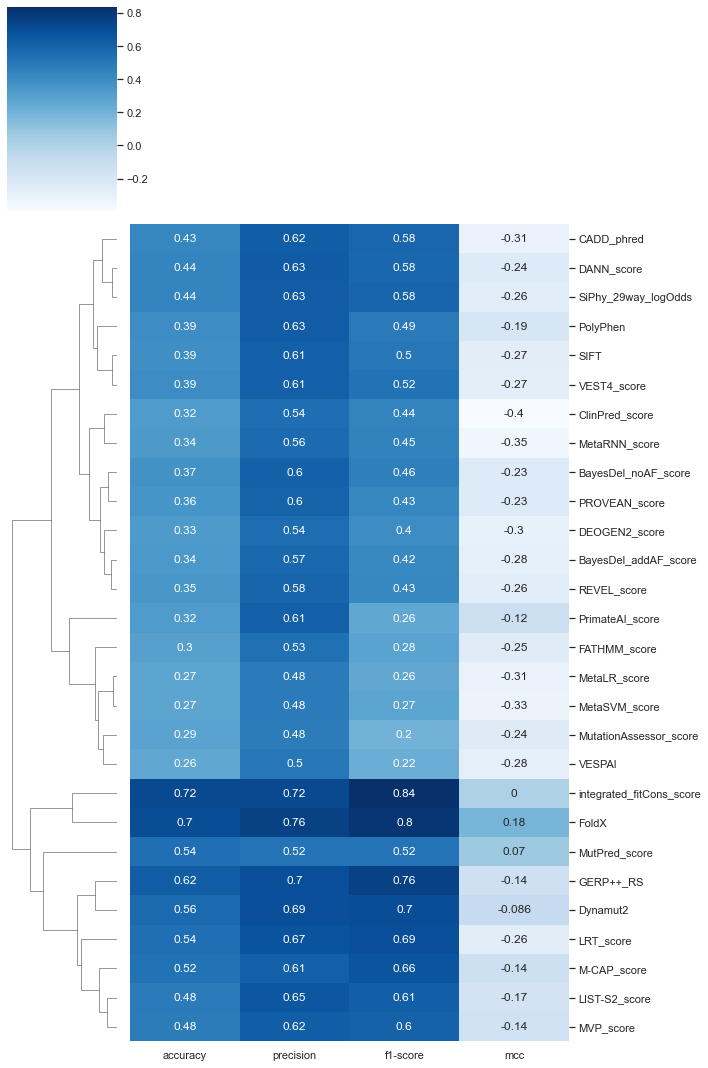

In [232]:
perf_dm_all = perf_dm_all.rename(index = perf_dm_all['vep'])
# plt.figure(figsize=(8, 10))
sns.clustermap(perf_dm_all.iloc[:,[1,2,3,4]], figsize=(10, 15),cmap="Blues",annot=True, col_cluster=False)
# ,cbar_kws={'label': 'metrics'}
plt.tight_layout()
plt.savefig('Genebass_performance_DMvariants.png',bbox_inches='tight')

In [250]:
gb_with_dyna = pd.read_csv('Genebass_with_Dynamut2_df.csv')
# gb_with_dyna
gb_with_vespa = pd.read_csv('Genebass_with_VESPAl_df.csv')
# gb_with_vespa
gb_with_fx = pd.read_csv('Genebass_with_FoldX_df.csv')
# gb_with_fx
gb_with_rasp = pd.read_csv('Genebass_with_RaSP_df.csv')

/Users/joannahench/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (20,21,22,23,24,25,26,28,30,31,32,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/joannahench/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/joannahench/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13,14,15,16,17,18,19,21,23,24,25,26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [252]:
genebass_dm_dyna = pd.merge(gb_with_dyna,overlap_var)
genebass_dm_ves = pd.merge(gb_with_vespa,overlap_var)
genebass_dm_fx = pd.merge(gb_with_fx,overlap_var)
genebass_dm_rasp = pd.merge(gb_with_rasp,overlap_var)


In [382]:
# perf_df_noAG = get_performance(VEPwithGB_icd10,None)
perf_df_dm = get_performance(genebass_dm,'max',1,pval=0.1,general=True)
perf_dyna = get_performance_other(genebass_dm_dyna,'Dynamut2','max',1,pval=0.1,general=True)
perf_ves = get_performance_other(genebass_dm_ves,'VESPAl','max',1,pval=0.1,general=True)
perf_fx = get_performance_other(genebass_dm_fx,'FoldX','max',1,pval=0.1,general=True)
perf_rasp = get_performance_other(genebass_dm_rasp,'RaSP','max',1,pval=0.1,general=True)
perf_dm_all = pd.concat([perf_df_dm,perf_dyna,perf_ves,perf_fx,perf_rasp],ignore_index=True)
perf_dm_all


/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_33483/2450649868.py:157: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  ag_df = vep_gb_df.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).max()[['vep_group','GB_group']]


,vep,accuracy,precision,f1-score,mcc,specificity,sensitivity,AUC
0,SIFT,0.386555,0.622951,0.510067,-0.272314,0.258065,0.431818,0.344941
1,PolyPhen,0.394958,0.648148,0.492958,-0.189698,0.387097,0.397727,0.392412
2,BayesDel_addAF_score,0.322034,0.571429,0.411765,-0.317582,0.322581,0.321839,0.322210
3,BayesDel_noAF_score,0.355932,0.603774,0.457143,-0.273937,0.322581,0.367816,0.345198
4,CADD_phred,0.445378,0.644737,0.597561,-0.287024,0.129032,0.556818,0.342925
5,ClinPred_score,0.305085,0.542373,0.438356,-0.442881,0.129032,0.367816,0.248424
6,DANN_score,0.440678,0.647887,0.582278,-0.249668,0.193548,0.528736,0.361142
7,DEOGEN2_score,0.309735,0.543478,0.390625,-0.338334,0.322581,0.304878,0.313729
8,FATHMM_score,0.278261,0.533333,0.278261,-0.278431,0.533333,0.188235,0.360784
9,integrated_fitCons_score,0.737288,0.737288,0.848780,0.000000,0.000000,1.000000,0.500000


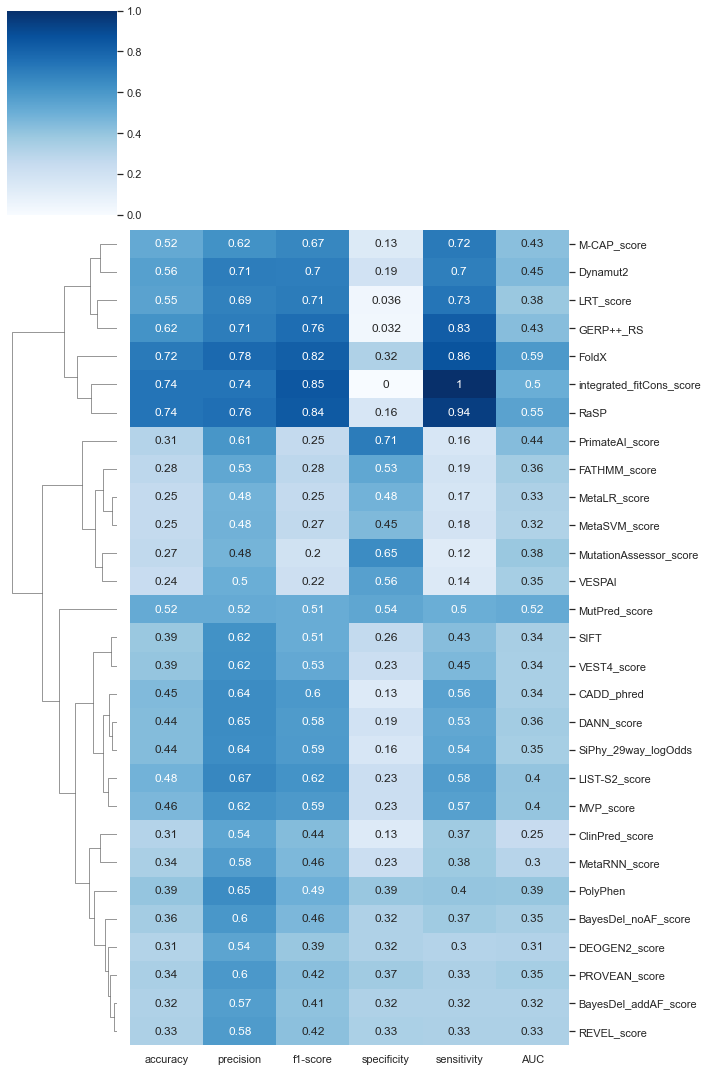

In [377]:
perf_dm_all = perf_dm_all.rename(index = perf_dm_all['vep'])
# plt.figure(figsize=(8, 10))
sns.clustermap(perf_dm_all.iloc[:,[1,2,3,5,6,7]], figsize=(10, 15),cmap="Blues",annot=True, col_cluster=False)
# ,cbar_kws={'label': 'metrics'}
plt.tight_layout()
# plt.savefig('Genebass_performance_DMvariants.png',bbox_inches='tight')

In [341]:
perf_dm_p_all = pd.DataFrame()
pval_list=[0.9,0.5,0.2,0.1,0.01,0.001,0.0001]
for i in range(len(pval_list)):
    perf_df_dm = get_performance(genebass_dm,'max',beta=1,pval=pval_list[i],general=True)
    perf_df_dm['pval']=pval_list[i]
    perf_dyna = get_performance_other(genebass_dm_dyna,'Dynamut2','max',beta=1,pval=pval_list[i],general=True)
    perf_dyna['pval']=pval_list[i]
    perf_ves = get_performance_other(genebass_dm_ves,'VESPAl','max',beta=1,pval=pval_list[i],general=True)
    perf_ves['pval']=pval_list[i]
    perf_fx = get_performance_other(genebass_dm_fx,'FoldX','max',beta=1,pval=pval_list[i],general=True)
    perf_fx['pval']=pval_list[i]
    perf_rasp = get_performance_other(genebass_dm_rasp,'RaSP','max',beta=1,pval=pval_list[i],general=True)
    perf_rasp['pval']=pval_list[i]    
    perf_dm_p_all = pd.concat([perf_dm_p_all,perf_df_dm,perf_dyna,perf_ves,perf_fx,perf_rasp],ignore_index=True)




/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_33483/2450649868.py:157: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  ag_df = vep_gb_df.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).max()[['vep_group','GB_group']]
/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_33483/2450649868.py:157: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  ag_df = vep_gb_df.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).max()[['vep_group','GB_group']]
/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_33483/2450649868.py:157: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError wi

In [284]:
perf_dm_beta_all = pd.DataFrame()
beta_list=[-1,0,1,2,3,4,5,6,7]
for i in range(len(beta_list)):
    perf_df_dm = get_performance(genebass_dm,'max',beta_list[i],0.1,general=True)
    perf_df_dm['beta']=beta_list[i]
    perf_dyna = get_performance_other(genebass_dm_dyna,'Dynamut2','max',beta_list[i],0.1,general=True)
    perf_dyna['beta']=beta_list[i]
    perf_ves = get_performance_other(genebass_dm_ves,'VESPAl','max',beta_list[i],0.1,general=True)
    perf_ves['beta']=beta_list[i]
    perf_fx = get_performance_other(genebass_dm_fx,'FoldX','max',beta_list[i],0.1,general=True)
    perf_fx['beta']=beta_list[i]
    perf_rasp = get_performance_other(genebass_dm_rasp,'RaSP','max',beta_list[i],0.1,general=True)
    perf_rasp['beta'] = beta_list[i]
    perf_dm_beta_all = pd.concat([perf_dm_beta_all,perf_df_dm,perf_dyna,perf_ves,perf_fx,perf_rasp],ignore_index=True)



/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_33483/2450649868.py:157: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  ag_df = vep_gb_df.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).max()[['vep_group','GB_group']]
/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_33483/2450649868.py:157: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  ag_df = vep_gb_df.groupby(by=["SYMBOL","Protein_position","Amino_acids"]).max()[['vep_group','GB_group']]
/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_33483/2450649868.py:157: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError wi

In [358]:
# import the names of VEPs
VEP_list_sub = [
# "SIFT",
"PolyPhen",
# "BayesDel_addAF_score",
# "BayesDel_noAF_score",
"CADD_phred",
# "ClinPred_score",
"DANN_score",
# "DEOGEN2_score",
"FATHMM_score",
# "integrated_fitCons_score",
# "LIST-S2_score",
# "LRT_score",
# "M-CAP_score",
# "MVP_score",
# "MetaLR_score",
# "MetaRNN_score",
# "MetaSVM_score",
# "MutationAssessor_score",
# "PROVEAN_score",
# "PrimateAI_score",
# "REVEL_score",
# "VEST4_score",
"GERP++_RS",
# "SiPhy_29way_logOdds",
"MutPred_score"
]


/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_33483/847606262.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(),fontsize=14)
/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_33483/847606262.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(),fontsize=14)


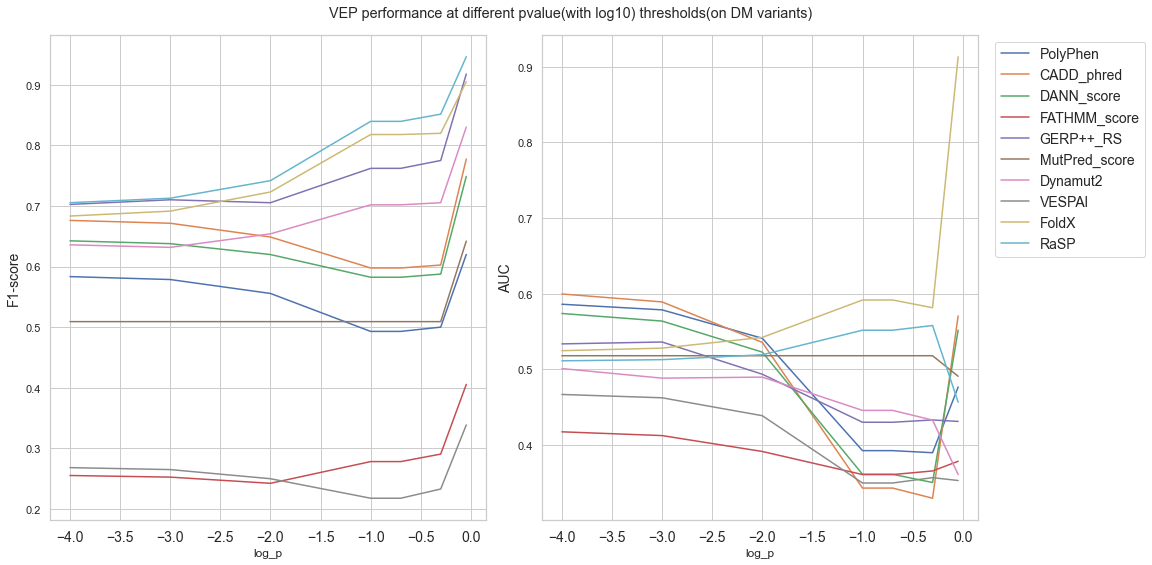

In [376]:
sns.set(style="whitegrid")
perf_dm_p_all['log_p'] = np.log10(perf_dm_p_all['pval'])
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))

# Plot the first lineplot on the first subplot

sns.lineplot(data=perf_dm_p_all[perf_dm_p_all['vep'].isin(VEP_list_sub+['Dynamut2','VESPAl','FoldX','RaSP'])], x='log_p', y='f1-score', hue='vep',err_style="bars",ax=axes[0])
# Rotate x-axis labels on ax1
# axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
# Remove x-label
# axes[0].set_xlabel(None)
axes[0].set_xticklabels(axes[0].get_xticklabels(),fontsize=14)
# axes[0].set_xlabel(None)
axes[0].set_ylabel('F1-score',fontsize=14)
axes[0].legend('', frameon=False)

# Plot the second lineplot on the second subplot
sns.lineplot(data=perf_dm_p_all[perf_dm_p_all['vep'].isin(VEP_list_sub+['Dynamut2','VESPAl','FoldX','RaSP'])], x='log_p', y='AUC', hue='vep',err_style="bars",ax=axes[1])
# axes[1].set_xlim(0,0.1)
# Rotate x-axis labels on ax1
# axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
# Remove x-label
# axes[1].set_xlabel(None)

axes[1].set_xticklabels(axes[1].get_xticklabels(),fontsize=14)
# axes[1].set_xlabel(None)
axes[1].set_ylabel('AUC',fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1),fontsize=14)

# Set the common y-axis label
fig.suptitle('VEP performance at different pvalue(with log10) thresholds(on DM variants)')
plt.tight_layout()


plt.savefig('/Users/joannahench/Documents/UCPH/MSc_Thesis/thesis_figures/gb_thresh_p_f1_auc.png')
# Show the plot
plt.show()

In [287]:
perf_dm_beta_all

,vep,accuracy,precision,f1-score,mcc,specificity,sensitivity,AUC,beta
0,SIFT,0.495798,0.967213,0.662921,-0.127489,0.000000,0.504274,0.252137,-1
1,PolyPhen,0.436975,0.962963,0.608187,-0.143444,0.000000,0.444444,0.222222,-1
2,BayesDel_addAF_score,0.398305,0.959184,0.569697,-0.155816,0.000000,0.405172,0.202586,-1
3,BayesDel_noAF_score,0.432203,0.962264,0.603550,-0.145414,0.000000,0.439655,0.219828,-1
4,CADD_phred,0.621849,0.973684,0.766839,-0.098344,0.000000,0.632479,0.316239,-1
...,...,...,...,...,...,...,...,...,...
256,MutPred_score,0.535714,0.518519,0.518519,0.070243,0.551724,0.518519,0.535121,7
257,Dynamut2,0.564103,0.682353,0.694611,-0.065856,0.228571,0.707317,0.467944,7
258,VESPAl,0.278846,0.500000,0.226804,-0.255448,0.620690,0.146667,0.383678,7
259,FoldX,0.683761,0.736842,0.790960,0.163322,0.285714,0.853659,0.569686,7


/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_33483/4028685021.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(),fontsize=14)
/var/folders/d_/0pdh465d0yj2_tbpjd8dr11c0000gn/T/ipykernel_33483/4028685021.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(),fontsize=14)


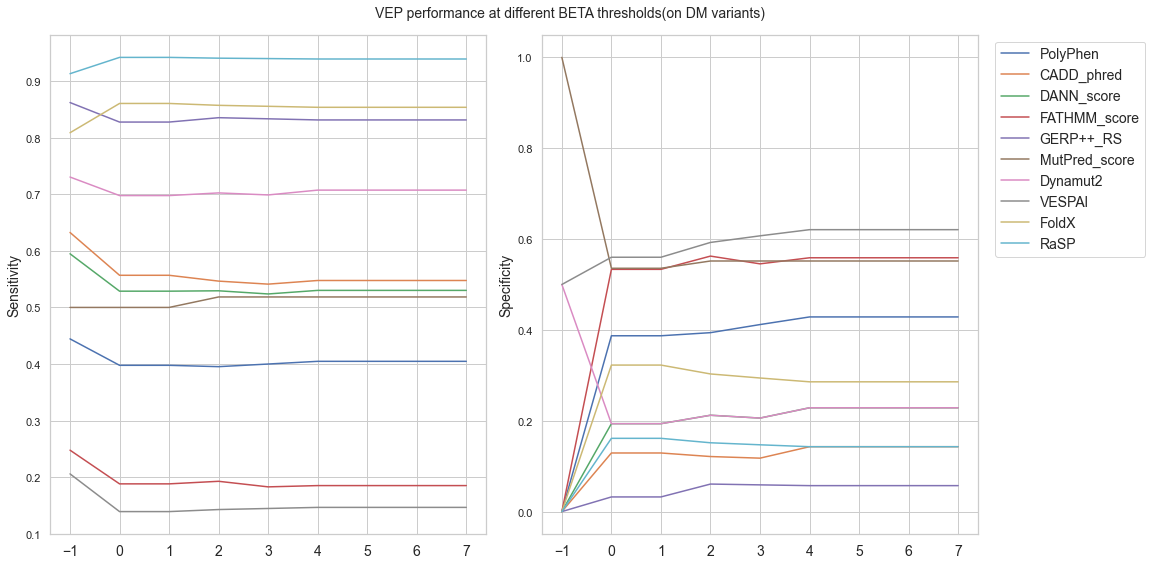

In [371]:
sns.set(style="whitegrid")
# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))

# Plot the first lineplot on the first subplot

sns.lineplot(data=perf_dm_beta_all[perf_dm_beta_all['vep'].isin(VEP_list_sub+['Dynamut2','VESPAl','FoldX','RaSP'])], x='beta', y='sensitivity', hue='vep',err_style="bars",ax=axes[0])
# Rotate x-axis labels on ax1
axes[0].set_xticklabels(axes[0].get_xticklabels(),fontsize=14)
axes[0].set_xlabel(None)
axes[0].set_ylabel('Sensitivity',fontsize=14)
# Remove x-label

axes[0].legend('', frameon=False)

# Plot the second lineplot on the second subplot
sns.lineplot(data=perf_dm_beta_all[perf_dm_beta_all['vep'].isin(VEP_list_sub+['Dynamut2','VESPAl','FoldX','RaSP'])], x='beta', y='specificity', hue='vep',err_style="bars",ax=axes[1])
# axes[1].set_xlim(0,0.1)
# Rotate x-axis labels on ax1
axes[1].set_xticklabels(axes[1].get_xticklabels(),fontsize=14)
# Remove x-label
axes[1].set_xlabel(None)
axes[1].set_ylabel('Specificity',fontsize=14)

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1),fontsize=14)

# Set the common y-axis label
fig.suptitle('VEP performance at different BETA thresholds(on DM variants)',fontsize=14)
plt.tight_layout()
# Show the plot
plt.savefig('/Users/joannahench/Documents/UCPH/MSc_Thesis/thesis_figures/gb_thresh_beta_sen_spe.png')
# Show the plot
plt.show()

In [271]:
genebass_dm
genebass_dm['class'] = genebass_dm.apply(lambda row: 'no/low effect' if (row['BETA'] < 2 and row['Pvalue']>0.1) else 'have effect', axis=1)
# VEPwithGB_select['pca_class'] = VEPwithGB_select.apply(lambda row: 0 if (row['pca1'] < 0) else 1, axis=1)

class_counts = genebass_dm['class'].value_counts()
print(class_counts)

no/low effect    4893
have effect       314
Name: class, dtype: int64


Text(336.9714285714286, 0.5, '-log10(P.Val)')

<Figure size 720x720 with 0 Axes>

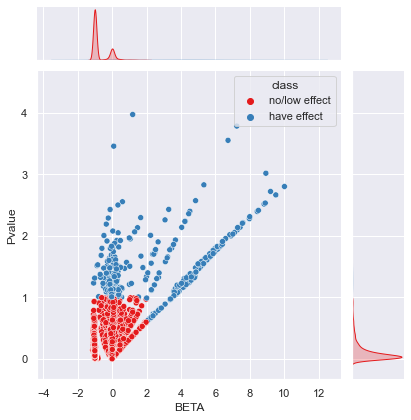

In [272]:
sns.set_style('darkgrid')
# take all beta and p-value and make vocano plot
plt.figure(figsize=(10, 10))
sns.jointplot(data=genebass_dm, x="BETA", y=genebass_dm['Pvalue'].apply(lambda x:-np.log10(x)), hue="class", palette="Set1")
# sns.jointplot(data=VEPwithGB_select, x="BETA", y=VEPwithGB_select['Pvalue'].apply(lambda x:-np.log10(x)), hue="pca_class", palette="Set1")
plt.ylabel("-log10(P.Val)")

In [273]:
# import the names of VEPs
VEP_list = ["SIFT",
"PolyPhen",
"BayesDel_addAF_score",
"BayesDel_noAF_score",
"CADD_phred",
"ClinPred_score",
"DANN_score",
"DEOGEN2_score",
"FATHMM_score",
"integrated_fitCons_score",
"LIST-S2_score",
"LRT_score",
"M-CAP_score",
"MVP_score",
"MetaLR_score",
"MetaRNN_score",
"MetaSVM_score",
"MutationAssessor_score",
"PROVEAN_score",
"PrimateAI_score",
"REVEL_score",
"VEST4_score",
"GERP++_RS",
"SiPhy_29way_logOdds",
"MutPred_score"]

In [ ]:
sns.set_style('white')
for i in range(len(VEP_list)):
    vep = sthresh['VEP'][i]
    temp1 = genebass_dm[genebass_dm[vep]!='-'][['SYMBOL', 'Protein_position','Amino_acids',vep,'BETA','Pvalue','class']].reset_index(drop=True)
    
    p1 = re.compile(r'[(](.*?)[)]', re.S)
    if vep == 'SIFT' or vep == 'PolyPhen':
        temp1[vep] = temp1[vep].apply(lambda x: float(re.findall(p1,x)[0])) 
    elif vep == 'DEOGEN2_score' or vep == 'FATHMM_score' or vep == 'LIST-S2_score' or vep == 'MetaRNN_score' or vep == 'MVP_score' or vep == 'MutationAssessor_score' or vep == 'PROVEAN_score' or vep == 'REVEL_score' or vep == 'VEST4_score':
        temp2 = temp1[vep].apply(lambda x: list(set(str(x).split(',')) - set(['.'])))
        temp2 = temp2.apply(lambda x: float(x[0]) if len(x) > 0 else None)
        temp1[vep] = temp2
        temp1 = temp1.dropna(subset=[vep]).reset_index(drop=True)
    temp1[vep] = temp1[vep].astype(float)
    plt.figure(figsize=(10, 10))
    sns.displot(data=temp1, x=vep,common_norm=False, hue="class",  kind="kde", palette="Set1")
    # plt.savefig(f'cancersubset_distribution_vepscores_2groups/{vep}.png')
    # ax = sns.boxplot(data=temp1, x=vep, y="class")
    plt.show()


<Axes: xlabel='SIFT', ylabel='Probability'>

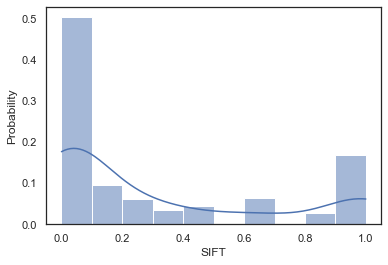

In [328]:

vep = VEP_list[0]
temp1 = genebass_dm[genebass_dm[vep]!='-'][['SYMBOL', 'Protein_position','Amino_acids',vep,'BETA','Pvalue','class']].reset_index(drop=True)

p1 = re.compile(r'[(](.*?)[)]', re.S)
if vep == 'SIFT' or vep == 'PolyPhen':
    temp1[vep] = temp1[vep].apply(lambda x: float(re.findall(p1,x)[0])) 
elif vep == 'DEOGEN2_score' or vep == 'FATHMM_score' or vep == 'LIST-S2_score' or vep == 'MetaRNN_score' or vep == 'MVP_score' or vep == 'MutationAssessor_score' or vep == 'PROVEAN_score' or vep == 'REVEL_score' or vep == 'VEST4_score':
    temp2 = temp1[vep].apply(lambda x: list(set(str(x).split(',')) - set(['.'])))
    temp2 = temp2.apply(lambda x: float(x[0]) if len(x) > 0 else None)
    temp1[vep] = temp2
    temp1 = temp1.dropna(subset=[vep]).reset_index(drop=True)
temp1[vep] = temp1[vep].astype(float)

# Compute the proportions for each class
# props = temp1.groupby('class')['vep'].apply(lambda x: x.size / temp1[vep].size)
# sns.kdeplot(data=temp1[temp1['class']=='no/low effect'], x=vep,  kind="kde", palette="Set1")
temp1[temp1['class']=='no/low effect']
sns.histplot(temp1[temp1['class']=='have effect'],x=vep,  kde=True,stat='probability')

# sns.plot(x, stat='density');


<Axes: xlabel='SIFT', ylabel='Probability'>

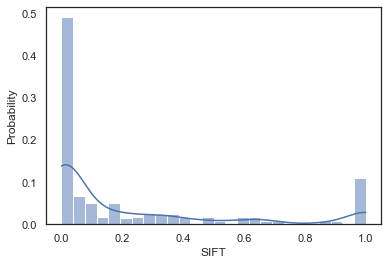

In [330]:
sns.histplot(temp1[temp1['class']=='no/low effect'],x=vep,  kde=True,stat='probability')